In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr


In [ ]:
# Models
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [ ]:
# Preprocessing
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Options
pd.set_option('display.max_columns',50)
plt.style.use('bmh')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/LinearRegression")
!ls

epi_r.csv  nyc-east-river-bicycle-counts1.csv  weatherHistory.csv
Flood	   nyc-east-river-bicycle-counts.csv


In [ ]:

for dirname, _, filenames in os.walk('/content/drive/MyDrive/LinearRegression'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/LinearRegression/nyc-east-river-bicycle-counts1.csv
/content/drive/MyDrive/LinearRegression/nyc-east-river-bicycle-counts.csv
/content/drive/MyDrive/LinearRegression/epi_r.csv
/content/drive/MyDrive/LinearRegression/weatherHistory.csv
/content/drive/MyDrive/LinearRegression/Flood/test.csv/test.csv
/content/drive/MyDrive/LinearRegression/Flood/train.csv/train.csv
/content/drive/MyDrive/LinearRegression/Flood/sample_submission.csv/sample_submission.csv


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/LinearRegression/Flood/train.csv/train.csv', index_col ='id')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/LinearRegression/Flood/test.csv/test.csv', index_col ='id')

In [ ]:
train.shape

(1117957, 21)

In [ ]:
test.shape

(745305, 20)

In [ ]:
# train.info()

In [ ]:
# test.info()

In [ ]:
cols = train.drop('FloodProbability', axis = 1).columns.tolist()

In [ ]:
cols

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors']

In [ ]:
# for col in cols:
#     fig, ax = plt.subplots(figsize=(6,2))
#     max_val = round(train[col].max()) + 1
#     train[col].hist(density=True,bins = np.arange(0,max_val,1), ax=ax)
#     plt.xticks(np.arange(0,20,1))
#     plt.title(col)
#     plt.show

In [ ]:
round(train.agg(['min','mean','median','max','var','std','skew']),2).T

,min,mean,median,max,var,std,skew
MonsoonIntensity,0.00,4.92,5.0,16.00,4.23,2.06,0.44
TopographyDrainage,0.00,4.93,5.0,18.00,4.38,2.09,0.46
RiverManagement,0.00,4.96,5.0,16.00,4.29,2.07,0.43
Deforestation,0.00,4.94,5.0,17.00,4.21,2.05,0.43
Urbanization,0.00,4.94,5.0,17.00,4.34,2.08,0.44
ClimateChange,0.00,4.93,5.0,17.00,4.23,2.06,0.43
DamsQuality,0.00,4.96,5.0,16.00,4.34,2.08,0.44
Siltation,0.00,4.93,5.0,16.00,4.27,2.07,0.45
AgriculturalPractices,0.00,4.94,5.0,16.00,4.28,2.07,0.42
Encroachments,0.00,4.95,5.0,18.00,4.34,2.08,0.46


In [ ]:
corr = train.drop('FloodProbability', axis=1).corr()
# corr

In [ ]:
mask = np.triu(np.ones_like(corr, dtype = bool))


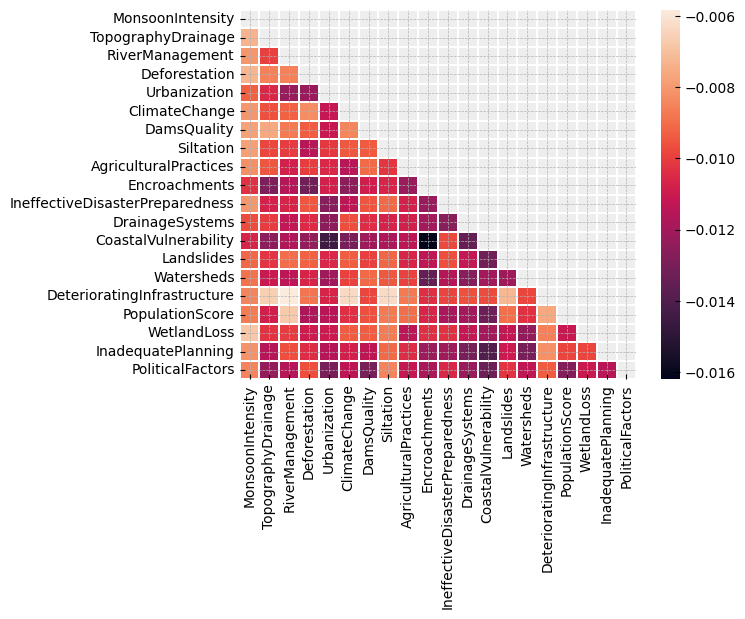

In [ ]:
sns.heatmap(corr, mask = mask,linewidth=0.1)
plt.show()

Preprocessing.
Outliers: All variables have outliers

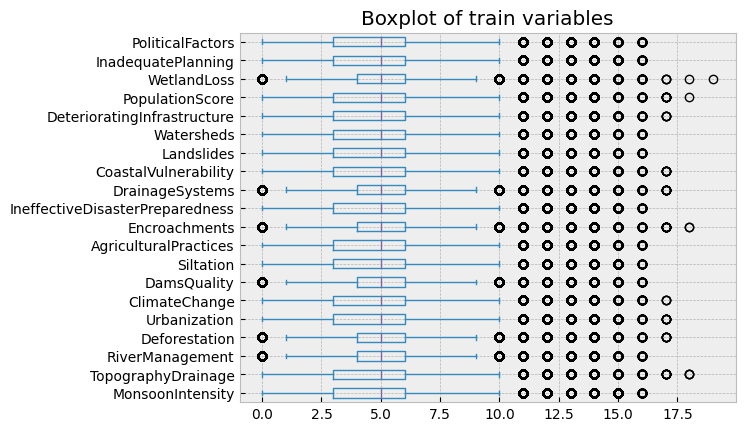

In [ ]:
train.drop('FloodProbability', axis=1).plot(kind='box',vert=False)
plt.title('Boxplot of train variables')
plt.show()

Removing outliers

In [ ]:
for col in cols:
    col_iqr = iqr(train[col])
    Q1, Q3 = np.quantile(train[col], [0.25, 0.75])

    # Convert outliers to np.nan
    train.loc[train[col] < (Q1 - 1.5*col_iqr), col] = np.nan
    train.loc[train[col] > (Q3 + 1.5*col_iqr), col] = np.nan

Calculation percentage of outliers.

In [ ]:
train.isna().sum()/train.shape[0]

MonsoonIntensity                   0.008269
TopographyDrainage                 0.008565
RiverManagement                    0.026492
Deforestation                      0.025256
Urbanization                       0.008215
ClimateChange                      0.007784
DamsQuality                        0.027816
Siltation                          0.008121
AgriculturalPractices              0.008056
Encroachments                      0.027855
IneffectiveDisasterPreparedness    0.008001
DrainageSystems                    0.026888
CoastalVulnerability               0.009132
Landslides                         0.007930
Watersheds                         0.008270
DeterioratingInfrastructure        0.008024
PopulationScore                    0.008310
WetlandLoss                        0.026387
InadequatePlanning                 0.008318
PoliticalFactors                   0.008683
FloodProbability                   0.000000
dtype: float64

In [ ]:
print('Shape before :',train.shape)
train.dropna(how='any', inplace=True)
print("Shape after :",train.shape)

Shape before : (1117957, 21)
Shape after : (849100, 21)


In [ ]:
y = train['FloodProbability']
X = train.drop('FloodProbability', axis=1)

In [ ]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)
test[test.columns] = scaler.transform(test)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =  666)

In [ ]:
# patients_train_data, patients_test_data, \
# patients_train_target, patients_test_target = \
# train_test_split(patients['data'],patients['target'], test_size=0.1)

In [ ]:
# rom sklearn.metrics import mean_squared_error
# print("Mean squared error of a learned model: %.2f" %
#       mean_squared_error(patients_test_target, linear_regression.predict(patients_test_data)))

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [ ]:
print(f"Dla regresji liniowej wartość RMSE wynosi: {mean_squared_error(y_test, y_pred_lr, squared=False)}")

Dla regresji liniowej wartość RMSE wynosi: 0.020258012299887867


In [ ]:
y_pred_lr


array([0.4663428 , 0.40429196, 0.47767818, ..., 0.48300457, 0.5113592 ,
       0.3812876 ])

Using trained model

In [ ]:
index = 1
linear_regression_prediction = model_lr.predict(X_test.iloc[[index]].values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
linear_regression_prediction

array([0.40429196])

In [ ]:
print("Model predicted for first row in test sample with index number {0} value {1}".format(index, linear_regression_prediction))

Model predicted for first row in test sample with index number 1 value [0.40429196]


In [ ]:
print("Real value for first row in test sample with index number \"{0}\" is {1}".format(index, y_test.iloc[index]))

Real value for first row in test sample with index number "1" is 0.395


In [ ]:
print('Coefficients of a learned model: \n', model_lr.coef_)

Coefficients of a learned model: 
 [0.0110281  0.01136362 0.01066833 0.01061734 0.01128141 0.01115108
 0.01062173 0.01117572 0.0111373  0.01067701 0.01132578 0.01059247
 0.01132286 0.01124247 0.0112633  0.01114609 0.01127896 0.01056691
 0.01121871 0.01131899]


In [ ]:
X_train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
117690,-1.989449,-0.948172,-0.999457,-1.004247,0.543980,0.555576,1.131718,-0.455621,-0.462834,-0.992531,0.039690,1.140005,1.042781,0.047847,1.553430,-0.961581,-0.453982,-2.06649,2.556645,-0.958351
993675,-0.453515,1.050545,1.129084,1.145644,0.543980,1.573458,1.131718,0.051794,0.548481,1.666960,-0.462354,-0.462834,1.042781,1.555179,0.549392,1.067970,-0.959554,0.06915,-0.459369,-0.457052
1094975,2.106374,1.550224,1.129084,0.070698,-0.460783,-0.971248,0.067293,1.066625,2.065454,-1.524429,0.541734,-0.462834,0.540460,0.047847,2.055449,0.560582,-0.453982,-1.53258,1.048638,0.044247
592915,-1.989449,-1.947530,0.596948,-2.079193,-1.967928,0.046635,-1.529343,1.066625,-0.968492,2.198858,-1.466442,1.674285,0.540460,0.047847,1.051411,1.067970,0.557162,-0.46476,0.043300,1.046845
28260,0.058463,0.051187,0.064813,0.070698,-0.460783,-0.462306,-1.529343,1.574040,0.548481,-0.460633,0.039690,-0.462834,0.540460,0.047847,1.051411,-0.454194,0.051590,0.60306,1.551307,2.049443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399096,-0.965493,-0.948172,-0.467322,-1.004247,0.041599,0.555576,1.131718,1.066625,0.042823,0.071265,-1.968486,0.605726,-0.966505,-0.454597,-1.458683,1.067970,-0.453982,0.60306,-0.459369,1.548144
3764,-0.453515,0.051187,-1.531592,0.070698,-0.963165,-1.480189,-0.464919,-0.963036,1.054139,-1.524429,2.549909,0.071446,0.540460,0.047847,0.549392,0.560582,-0.959554,0.60306,0.043300,2.049443
854645,1.082419,0.051187,-0.999457,1.145644,2.553507,0.046635,-0.997131,-1.470451,-1.474150,-0.460633,1.043778,-1.531393,-0.966505,0.550291,-0.454646,-0.454194,0.051590,0.06915,-0.962038,0.545546


In [ ]:
linear_regression_predictions = model_lr.predict(X_test)
print(linear_regression_predictions)

[0.4663428  0.40429196 0.47767818 ... 0.48300457 0.5113592  0.3812876 ]


Model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" %
      mean_squared_error(y_test, y_pred_lr, squared = False))

Mean squared error of a learned model: 0.02


Determining Coefficient of determination with r2_score()



In [ ]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, y_pred_lr))

Variance score: 0.83


Model evaluation with cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=4)
print(scores)

[0.83370365 0.83338308 0.83407306 0.8348378 ]


In [ ]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.6)
lasso_regression.fit(X_train, y_train)
score = lasso_regression.score(X_test, y_test) #r2 score
print("Lasso regression variance score: %.2f" % score)

Lasso regression variance score: -0.00


In [ ]:
# X = data[:, 0]
# Y = data[:, 1]

In [ ]:
Xd = X['Deforestation'].to_numpy()

In [ ]:
Xd

array([ 1.68311641, -0.46677461,  1.14564366, ..., -0.46677461,
        1.14564366,  2.22058917])

In [ ]:
y

array([0.445, 0.45 , 0.53 , ..., 0.485, 0.495, 0.56 ])

In [ ]:
learning_rate = 0.1
max_iteration = 100

In [ ]:
m = 0
b = 0

In [ ]:
def h (m, b, X) :
  return m * X + b

In [ ]:
def loss (m, b, X, Y) :
  return np.average(np.square(Y - h(m, b, X))) / 2

In [ ]:
def gradient (m, b, X, Y) :
  dm = - np.average((Y - h(m, b, X)) * X)
  db = - np.average(Y - h(m, b, X))
  return (dm, db)

In [ ]:
def gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    dm, db = gradient (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y))
  return (m, b)

In [ ]:
m, b = gradient_descent (m, b, Xd, y, learning_rate, max_iteration)

iteration :  0  loss :  0.10237425261573284
iteration :  10  loss :  0.013494980473133245
iteration :  20  loss :  0.0026893359035912046
iteration :  30  loss :  0.0013756217861315312
iteration :  40  loss :  0.0012159048186423816
iteration :  50  loss :  0.0011964869640537
iteration :  60  loss :  0.0011941262062534822
iteration :  70  loss :  0.0011938391932178332
iteration :  80  loss :  0.0011938042991331346
iteration :  90  loss :  0.0011938000568270518


In [ ]:
m, b

(0.009118366132697587, 0.4997317914353026)